In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read data
trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv")

Data Dictionary
Survival 0-No, 1-Yes
pclass - TicketClass
sibsp - spouses aboard
parch - children aboard
embarked - C=Cherbourg, Q=Queenstown, S=Southampton

In [3]:
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
trainData.shape

(891, 12)

In [6]:
testData.shape #predict survival column (missing 1)

(418, 11)

In [7]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
trainData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
testData.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
sex = trainData.iloc[:,4:5]
print(sex)

        Sex
0      male
1    female
2    female
3    female
4      male
..      ...
886    male
887  female
888  female
889    male
890    male

[891 rows x 1 columns]


In [12]:
def barchart(feature):
    survived = trainData[trainData["Survived"]==1][feature].value_counts()
    dead = trainData[trainData["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ["Survived","Dead"]
    df.plot(kind="bar",stacked=True)

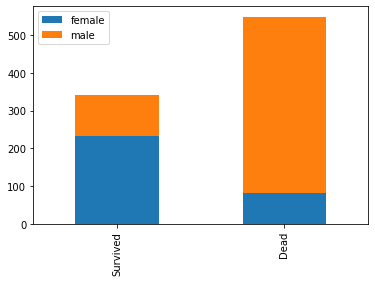

In [13]:
barchart("Sex")

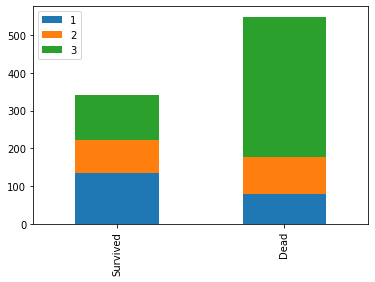

In [14]:
barchart("Pclass")

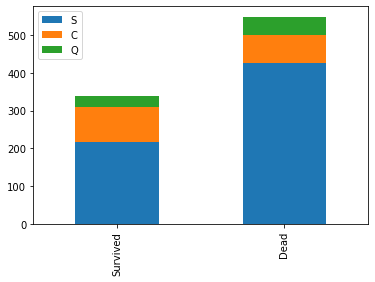

In [15]:
barchart("Embarked")

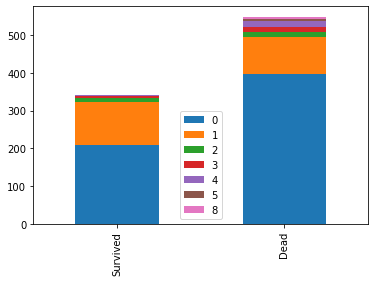

In [16]:
barchart("SibSp")

In [17]:
print(trainData.corr())

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [18]:
trainData = trainData.drop(['Ticket', 'Cabin'], axis=1)
testData = testData.drop(['Ticket', 'Cabin'], axis=1)
combine = [trainData,testData]

In [19]:
trainData.shape

(891, 10)

In [20]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [21]:
trainData["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Sir           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Lady          1
Mme           1
Ms            1
Name: Title, dtype: int64

In [22]:
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(["Lady","Countess","Capt","Col","Don","Dr","Major","Rev",
                                                 "Sir","Jonkheer","Dona"],"Rare")
    dataset["Title"] = dataset["Title"].replace("Mlle","Miss")
    dataset["Title"] = dataset["Title"].replace("Ms","Miss")
    dataset["Title"] = dataset["Title"].replace("Mme","Mrs")
trainData[["Title","Survived"]].groupby(["Title"],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [23]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [24]:
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3


In [25]:
#we can drop name now
trainData = trainData.drop(["Name","PassengerId"],axis=1)
testData = testData.drop(["Name"],axis=1)
combine = [trainData,testData]
print(trainData.shape,testData.shape)

(891, 9) (418, 9)


In [26]:
trainData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [27]:
testData.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,1
1,893,3,female,47.0,1,0,7.0000,S,3
2,894,2,male,62.0,0,0,9.6875,Q,1
3,895,3,male,27.0,0,0,8.6625,S,1
4,896,3,female,22.0,1,1,12.2875,S,3


In [28]:
#sex categoric value
combine = [trainData,testData]
for dataset in combine:
    dataset["Sex"] = dataset["Sex"].map({"female":1,"male":0}).astype(int)
trainData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [29]:
testData.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,Q,1
1,893,3,1,47.0,1,0,7.0000,S,3
2,894,2,0,62.0,0,0,9.6875,Q,1
3,895,3,0,27.0,0,0,8.6625,S,1
4,896,3,1,22.0,1,1,12.2875,S,3


In [30]:
trainData.isnull().sum() #age and embarked must be filled

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [31]:
#fill age value with median of each title
trainData["Age"].fillna(trainData.groupby("Title")["Age"].transform("median"),inplace=True)

In [32]:
trainData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [33]:
testData["Age"].fillna(testData.groupby("Title")["Age"].transform("median"),inplace=True)

In [34]:
testData.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Title          0
dtype: int64

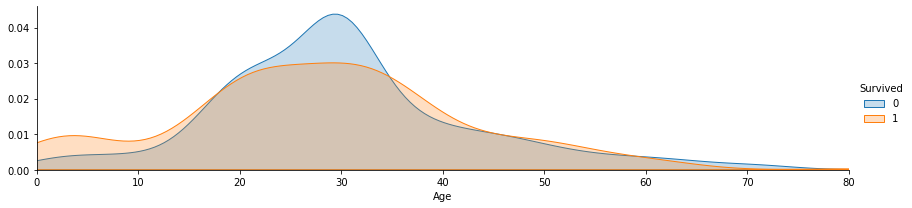

In [35]:
import seaborn as sns
agegrid = sns.FacetGrid(trainData,hue="Survived",aspect=4)
agegrid.map(sns.kdeplot,"Age",shade=True)
agegrid.set(xlim=(0,trainData["Age"].max()))
agegrid.add_legend()
plt.show()

In [36]:
trainData['AgeBand'] = pd.cut(trainData['Age'], 5)
trainData[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.548077
1,"(16.336, 32.252]",0.327345
2,"(32.252, 48.168]",0.439024
3,"(48.168, 64.084]",0.428571
4,"(64.084, 80.0]",0.090909


In [37]:
#convert age to categorical variable
combine = [trainData,testData]
for dataset in combine:
    dataset.loc[dataset["Age"] <= 16, "Age"] = 0;
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <= 32),"Age"] = 1
    dataset.loc[(dataset["Age"] > 32) & (dataset["Age"] <= 48),"Age"] = 2
    dataset.loc[(dataset["Age"] > 48) & (dataset["Age"] <= 64),"Age"] = 3
    dataset.loc[dataset["Age"] > 64 ,"Age"] = 7
trainData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1.0,1,0,7.2500,S,1,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,71.2833,C,3,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,7.9250,S,2,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,53.1000,S,3,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,8.0500,S,1,"(32.252, 48.168]"


In [38]:
trainData = trainData.drop(["AgeBand"],axis=1)
trainData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,S,1
1,1,1,1,2.0,1,0,71.2833,C,3
2,1,3,1,1.0,0,0,7.9250,S,2
3,1,1,1,2.0,1,0,53.1000,S,3
4,0,3,0,2.0,0,0,8.0500,S,1


In [39]:
trainData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

<AxesSubplot:>

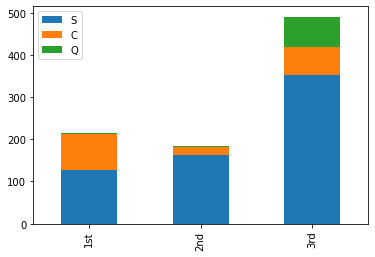

In [40]:
Pclass1 = trainData[trainData["Pclass"]==1]["Embarked"].value_counts()
Pclass2 = trainData[trainData["Pclass"]==2]["Embarked"].value_counts()
Pclass3 = trainData[trainData["Pclass"]==3]["Embarked"].value_counts()
dataFrame = pd.DataFrame([Pclass1,Pclass2,Pclass3])
dataFrame.index = ["1st","2nd","3rd"]
dataFrame.plot(kind="bar",stacked=True)

In [41]:
#s is the most frequent
combine = [trainData,testData]
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].fillna("S")

In [42]:
trainData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [43]:
trainData[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean().sort_values(by="Survived")

,Embarked,Survived
2,S,0.339009
1,Q,0.389610
0,C,0.553571


In [44]:
trainData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,S,1
1,1,1,1,2.0,1,0,71.2833,C,3
2,1,3,1,1.0,0,0,7.9250,S,2
3,1,1,1,2.0,1,0,53.1000,S,3
4,0,3,0,2.0,0,0,8.0500,S,1


In [45]:
testData.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2.0,0,0,7.8292,Q,1
1,893,3,1,2.0,1,0,7.0000,S,3
2,894,2,0,3.0,0,0,9.6875,Q,1
3,895,3,0,1.0,0,0,8.6625,S,1
4,896,3,1,1.0,1,1,12.2875,S,3


In [46]:
#converting embarked into categorical feature
embarked_mapping = {"S":0,"C":1,"Q":2}
combine = [trainData,testData]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
trainData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,0,1
1,1,1,1,2.0,1,0,71.2833,1,3
2,1,3,1,1.0,0,0,7.9250,0,2
3,1,1,1,2.0,1,0,53.1000,0,3
4,0,3,0,2.0,0,0,8.0500,0,1


In [47]:
testData.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2.0,0,0,7.8292,2,1
1,893,3,1,2.0,1,0,7.0000,0,3
2,894,2,0,3.0,0,0,9.6875,2,1
3,895,3,0,1.0,0,0,8.6625,0,1
4,896,3,1,1.0,1,1,12.2875,0,3


In [48]:
trainData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [49]:
testData.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Title          0
dtype: int64

In [50]:
testData["Fare"].fillna(testData.groupby("Pclass")["Fare"].transform("median"),inplace=True)
testData.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

In [51]:
dataset = [trainData,testData]
for dataset in combine:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
trainData[["FamilySize","Survived"]].groupby(["FamilySize"],as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [52]:
dataset = [trainData,testData]
for dataset in combine:
    dataset["IsAlone"] = 0
    dataset.loc[dataset["FamilySize"]==1,"IsAlone"] = 1
    
trainData[["IsAlone","Survived"]].groupby(["IsAlone"],as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [53]:
trainData = trainData.drop(["Parch","SibSp","FamilySize"],axis=1)
testData = testData.drop(["Parch","SibSp","FamilySize"],axis=1)
combine = [trainData,testData]
trainData.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1.0,7.2500,0,1,0
1,1,1,1,2.0,71.2833,1,3,0
2,1,3,1,1.0,7.9250,0,2,1
3,1,1,1,2.0,53.1000,0,3,0
4,0,3,0,2.0,8.0500,0,1,1


In [54]:
trainData['FareBand'] = pd.qcut(trainData['Fare'], 4)
trainData[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [55]:
combine = [trainData,testData]
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

trainData = trainData.drop(['FareBand'], axis=1)
combine = [trainData, testData]
    
trainData.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1.0,0,0,1,0
1,1,1,1,2.0,3,1,3,0
2,1,3,1,1.0,1,0,2,1
3,1,1,1,2.0,3,0,3,0
4,0,3,0,2.0,1,0,1,1
5,0,3,0,1.0,1,2,1,1
6,0,1,0,3.0,3,0,1,1
7,0,3,0,0.0,2,0,4,0
8,1,3,1,1.0,1,0,3,0
9,1,2,1,0.0,2,1,3,0


In [56]:
testData.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2.0,0,2,1,1
1,893,3,1,2.0,0,0,3,0
2,894,2,0,3.0,1,2,1,1
3,895,3,0,1.0,1,0,1,1
4,896,3,1,1.0,1,0,3,0
5,897,3,0,0.0,1,0,1,1
6,898,3,1,1.0,0,2,2,1
7,899,2,0,1.0,2,0,1,0
8,900,3,1,1.0,0,1,3,1
9,901,3,0,1.0,2,0,1,0


In [57]:
X_train = trainData.drop("Survived",axis=1)
Y_train = trainData["Survived"]
X_test = testData.drop("PassengerId",axis=1).copy()

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [59]:
logr = LogisticRegression()
logr.fit(X_train,Y_train)
Y_pred = logr.predict(X_test)
accuracy = round(logr.score(X_train,Y_train)*100,2)
print(accuracy)

80.25


In [60]:
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
acc = round(svc.score(X_train,Y_train)*100,2)
print(acc)

83.39


In [61]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
acc = round(knn.score(X_train,Y_train)*100,2)
print(acc)

83.84


In [62]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train,Y_train)
Y_pred = decisiontree.predict(X_test)
acc = round(decisiontree.score(X_train,Y_train)*100,2)
print(acc)

87.09


In [63]:
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,Y_train)
Y_pred = randomForest.predict(X_test)
acc = round(randomForest.score(X_train,Y_train)*100,2)
print(acc)

87.09


In [64]:
from sklearn.naive_bayes import GaussianNB
nvb = GaussianNB()
nvb.fit(X_train,Y_train)
Y_pred = nvb.predict(X_test)
acc = round(nvb.score(X_train,Y_train)*100,2)
print(acc)

77.89


In [65]:
#submission
prediction = randomForest.predict(X_test)
submission = pd.DataFrame({
    "PassengerId" : testData["PassengerId"],
    "Survived" : prediction
})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [66]:
submission.to_csv("submission.csv",index=False)

In [67]:
sub = pd.read_csv("submission.csv")
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
